Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 10)                70        
                                                                 
 dense_81 (Dense)            (None, 30)                330       
                                                                 
 dense_82 (Dense)            (None, 20)                620       
                                                                 
 dense_83 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
5/5 [==============================] - 1s

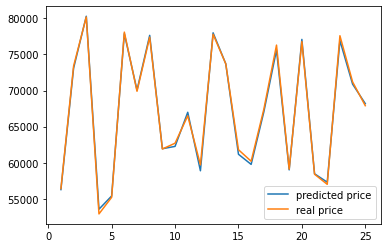

In [26]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt 
import seaborn as sns 

import pandas as pd 
import numpy as np 

import google.colab.drive as drive 

drive.mount('/content/drive') 
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/data/samsung.csv') 

df_tgt = df[['close', 'start', 'high', 'low', 'volume', 'transactionPrice', 'capitalization']] 
scaler = MinMaxScaler() 
scaler.fit(df_tgt) 
arr = scaler.transform(df_tgt) 
df1 = pd.DataFrame(arr, columns = df_tgt.columns) 

df1_corr = df1.corr() 
df1_corr_sort = df1_corr.sort_values('close', ascending = False) 
df1_corr_sort['close'].head(8) 

cols_train = ['capitalization', 'high', 'low', 'start', 'transactionPrice', 'volume'] 
X_train_pre = df1[cols_train] 
y = df['close'].values 
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size = 0.2) 

model = Sequential() 
model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu')) 
model.add(Dense(30, activation = 'relu')) 
model.add(Dense(20, activation = 'relu')) 
model.add(Dense(1)) 
model.summary() 

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse']) 

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20) 
modelpath = './drive/MyDrive/Colab Notebooks/data/model/wine/Homework4_model.hdf5' 
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only = True) 

history = model.fit(X_train, y_train, epochs = 2000, batch_size = 32, validation_split = 0.25, verbose = 1, callbacks = [early_stopping_callback, checkpointer]) # validation = 0.8 * 0.25 = 0.2

real_prices = []
pred_prices = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
  real = y_test[i]
  prediction = Y_prediction[i]
  print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
  real_prices.append(real)
  pred_prices.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

plt.plot(X_num, pred_prices, label = 'predicted price')
plt.plot(X_num, real_prices, label = 'real price')
plt.legend()
plt.show()